# ERDDAP Table/Grid 2 Mooring Site

- use Gridded hourly data to build complete mooring site record
    + will need to split on mooring type (profile vs non) and synthesize multi-deployments (A&B&C)
- use table data (from final and preliminary) to build sfc/shallowest and btm/deepest Salinity and Temperature
    + btm salinity (with collocated temperature)
    + btm temperature (no salinity... this may be deeper than the salinity records)

In [20]:
#identify mooring locations

In [21]:
from erddapy import ERDDAP
import pandas as pd
import numpy as np
import xarray as xa

import matplotlib.pyplot as plt
import cmocean

In [22]:
server_url = 'http://ecofoci-field.pmel.noaa.gov:8080/erddap'

### Loop through all datasets

In [23]:
e = ERDDAP(server=server_url)
df = pd.read_csv(e.get_search_url(response='csv', search_for='datasets_Mooring AND final AND 1hr_gridded  -Full'))
print(f"{df['Dataset ID'].count()} datasets to be looped through")
print("Names:", df['Dataset ID'].values)

476 datasets to be looped through
Names: ['1hr_gridded_datasets_Mooring_00bs2a_final'
 '1hr_gridded_datasets_Mooring_00bs2w_final'
 '1hr_gridded_datasets_Mooring_00bs3w_final'
 '1hr_gridded_datasets_Mooring_00bs4s_final'
 '1hr_gridded_datasets_Mooring_00bs4w_final'
 '1hr_gridded_datasets_Mooring_00bs6a_final'
 '1hr_gridded_datasets_Mooring_00cb1a_final'
 '1hr_gridded_datasets_Mooring_00kc1a_final'
 '1hr_gridded_datasets_Mooring_00kc2a_final'
 '1hr_gridded_datasets_Mooring_00pa1a_final'
 '1hr_gridded_datasets_Mooring_01bs2c_final'
 '1hr_gridded_datasets_Mooring_01bs4a_final'
 '1hr_gridded_datasets_Mooring_01bs4b_final'
 '1hr_gridded_datasets_Mooring_02bs2c_final'
 '1hr_gridded_datasets_Mooring_02bs4a_final'
 '1hr_gridded_datasets_Mooring_02bs4b_final'
 '1hr_gridded_datasets_Mooring_03bs2a_final'
 '1hr_gridded_datasets_Mooring_03bs2c_final'
 '1hr_gridded_datasets_Mooring_03bs4a_final'
 '1hr_gridded_datasets_Mooring_03bs4b_final'
 '1hr_gridded_datasets_Mooring_03cb1a_final'
 '1hr_gridded_

In [24]:
import warnings
warnings.filterwarnings("ignore")

In [25]:
write_data = False

In [26]:

def erddap_xmlbuild(xmlfilename, dataset_id, MooringName=None, datahost_path='/home/akutan/bell/in_and_outbox/erddap_generated/'):

    f=open(xmlfilename, "a+")

    f.write(f"""
    <dataset type="EDDGridFromNcFiles" datasetID="1hr_gridded_{dataset_id}" active="true">
        <reloadEveryNMinutes>10080</reloadEveryNMinutes>
        <updateEveryNMillis>10000</updateEveryNMillis>
        <fileDir>{datahost_path}</fileDir>
        <fileNameRegex>{dataset_id}.nc</fileNameRegex>
        <recursive>false</recursive>
        <pathRegex>.*</pathRegex>
        <metadataFrom>last</metadataFrom>
        <matchAxisNDigits>20</matchAxisNDigits>
        <fileTableInMemory>false</fileTableInMemory>
        <accessibleViaFiles>false</accessibleViaFiles>
        <!-- sourceAttributes>
        </sourceAttributes -->
        <addAttributes>
            <att name="cdm_data_type">Grid</att>
            <att name="Conventions">COARDS, CF-1.6, ACDD-1.3</att>
            <att name="infoUrl">https://pmel.noaa.gov/</att>
            <att name="institution">NOAA/PMEL - EcoFOCI</att>
            <att name="keywords">gridded, active, available, chemistry, chlorophyll, Chlorophyll_Fluorescence, color, concentration, concentration_of_chlorophyll_in_sea_water, data, date, density, depth, dissolved, dissolved o2, downwelling, downwelling_photosynthetic_photon_radiance_in_sea_water, earth, Earth Science &gt; Oceans &gt; Ocean Chemistry &gt; Chlorophyll, Earth Science &gt; Oceans &gt; Ocean Optics &gt; Photosynthetically Active Radiation, Earth Science &gt; Oceans &gt; Ocean Optics &gt; Radiance, Earth Science &gt; Oceans &gt; Salinity/Density &gt; Salinity, latitude, local, longitude, number, O2, ocean, ocean color, oceans, optical, optical properties, optics, oxygen, Oxygen_Concentration, Oxygen_Saturation, PAR, photon, photosynthetic, photosynthetically, practical, pressure, properties, radiance, radiation, salinity, saturation, science, sea, sea_water_practical_salinity, seawater, serial, Serial_Number, source, statistics, temperature, water</att>
            <att name="keywords_vocabulary">GCMD Science Keywords</att>
            <att name="license">[standard]</att>
            <att name="standard_name_vocabulary">CF Standard Name Table v55</att>
            <att name="summary">QC'd (final) mooring data from {MooringName}.  This dataset has been gridded to 1hr resolution (with pressure left at discrete depths).  It uses only 1hr_gridded_datasets.  A depth field exisists for each known instrument depth, even if the parameter wasn't measured at that depth. </att>
            <att name="title">Gridded Mooring Data from {MooringName} - final</att>
        </addAttributes>
        <axisVariable>
            <sourceName>depth</sourceName>
            <destinationName>depth</destinationName>
            <!-- sourceAttributes>
                <att name="_FillValue" type="double">NaN</att>
            </sourceAttributes -->
            <addAttributes>
                <att name="ioos_category">Location</att>
                <att name="long_name">Depth</att>
                <att name="standard_name">depth</att>
                <att name="units">m</att>
            </addAttributes>
        </axisVariable>
        <axisVariable>
            <sourceName>date</sourceName>
            <destinationName>time</destinationName>
            <!-- sourceAttributes>
                <att name="calendar">proleptic_gregorian</att>
                <att name="units">days since 1970-01-01 00:00:00</att>
            </sourceAttributes -->
            <addAttributes>
                <att name="ioos_category">Time</att>
                <att name="long_name">Date</att>
                <att name="source_name">date</att>
                <att name="standard_name">time</att>
                <att name="units">days since 1970-01-01 00:00:00</att>
            </addAttributes>
        </axisVariable>
        <dataVariable>
            <sourceName>latitude</sourceName>
            <destinationName>latitude</destinationName>
            <dataType>double</dataType>
            <!-- sourceAttributes>
                <att name="_FillValue" type="double">NaN</att>
            </sourceAttributes -->
            <addAttributes>
                <att name="colorBarMaximum" type="double">90.0</att>
                <att name="colorBarMinimum" type="double">-90.0</att>
                <att name="ioos_category">Location</att>
                <att name="long_name">Latitude</att>
                <att name="standard_name">latitude</att>
                <att name="units">degrees_north</att>
            </addAttributes>
        </dataVariable>
        <dataVariable>
            <sourceName>longitude</sourceName>
            <destinationName>longitude</destinationName>
            <dataType>double</dataType>
            <!-- sourceAttributes>
                <att name="_FillValue" type="double">NaN</att>
            </sourceAttributes -->
            <addAttributes>
                <att name="colorBarMaximum" type="double">180.0</att>
                <att name="colorBarMinimum" type="double">-180.0</att>
                <att name="ioos_category">Location</att>
                <att name="long_name">Longitude</att>
                <att name="standard_name">longitude</att>
                <att name="units">degrees_east</att>
            </addAttributes>
        </dataVariable>
        <dataVariable>
            <sourceName>temperature</sourceName>
            <destinationName>temperature</destinationName>
            <dataType>double</dataType>
            <!-- sourceAttributes>
                <att name="_FillValue" type="double">NaN</att>
            </sourceAttributes -->
            <addAttributes>
               <att name="missing_value" type="float">-9999.0</att>
               <att name="_FillValue" type="float">1.0e35</att>
                <att name="epic_key">T_20</att>
                <att name="long_name">Sea temperature in-situ ITS-90 scale</att>
                <att name="standard_name">sea_water_temperature</att>
                <att name="units">degree_C</att>
                <att name="colorBarMaximum" type="double">20.0</att>
                <att name="colorBarMinimum" type="double">-2.0</att>
                <att name="ioos_category">Temperature</att>
                <att name="standard_name">sea_water_temperature</att>
            </addAttributes>
        </dataVariable>
        <dataVariable>
            <sourceName>pressure</sourceName>
            <destinationName>pressure</destinationName>
            <dataType>double</dataType>
            <!-- sourceAttributes>
                <att name="_FillValue" type="double">NaN</att>
            </sourceAttributes -->
            <addAttributes>
               <att name="missing_value" type="float">-9999.0</att>
               <att name="_FillValue" type="float">1.0e35</att>
                <att name="ioos_category">Sea Level</att>
                <att name="long_name">Sea water pressure, equals 0 at sea-level</att>
                <att name="standard_name">sea_water_pressure_due_to_sea_water</att>
                <att name="units">dbar</att>  
            </addAttributes>
        </dataVariable>
        <dataVariable>
            <sourceName>salinity</sourceName>
            <destinationName>salinity</destinationName>
            <dataType>double</dataType>
            <!-- sourceAttributes>
                <att name="_FillValue" type="double">NaN</att>
            </sourceAttributes -->
            <addAttributes>
                <att name="missing_value" type="float">-9999.0</att>
                <att name="_FillValue" type="float">1.0e35</att>
                <att name="colorBarMaximum" type="double">37.0</att>
                <att name="colorBarMinimum" type="double">32.0</att>
                <att name="ioos_category">Salinity</att>
                <att name="long_name">Sea Water Practical Salinity</att>
                <att name="standard_name">sea_water_practical_salinity</att>
                <att name="units">PSU</att>
            </addAttributes>
        </dataVariable>
        <dataVariable>
            <sourceName>PAR</sourceName>
            <destinationName>PAR</destinationName>
            <dataType>double</dataType>
            <!-- sourceAttributes>
                <att name="_FillValue" type="double">NaN</att>
            </sourceAttributes -->
            <addAttributes>
                <att name="missing_value" type="float">-9999.0</att>
                <att name="_FillValue" type="float">1.0e35</att>
                <att name="colorBarMaximum" type="double">70.0</att>
                <att name="colorBarMinimum" type="double">0.0</att>
                <att name="ioos_category">Optical Properties</att>
                <att name="long_name">Downwelling Photosynthetic Photon Radiance In Sea Water</att>
                <att name="standard_name">downwelling_photosynthetic_photon_radiance_in_sea_water</att>
            </addAttributes>
        </dataVariable>
        <dataVariable>
            <sourceName>Chlorophyll_Fluorescence</sourceName>
            <destinationName>Chlorophyll_Fluorescence</destinationName>
            <dataType>double</dataType>
            <!-- sourceAttributes>
                <att name="_FillValue" type="double">NaN</att>
            </sourceAttributes -->
            <addAttributes>
                <att name="missing_value" type="float">-9999.0</att>
                <att name="_FillValue" type="float">1.0e35</att>
                <att name="colorBarMaximum" type="double">30.0</att>
                <att name="colorBarMinimum" type="double">0.03</att>
                <att name="colorBarScale">Log</att>
                <att name="ioos_category">Ocean Color</att>
                <att name="long_name">Concentration Of Chlorophyll In Sea Water</att>
                <att name="standard_name">concentration_of_chlorophyll_in_sea_water</att>
            </addAttributes>
        </dataVariable>
        <dataVariable>
            <sourceName>Oxygen_Saturation</sourceName>
            <destinationName>Oxygen_Saturation</destinationName>
            <dataType>double</dataType>
            <!-- sourceAttributes>
                <att name="_FillValue" type="double">NaN</att>
            </sourceAttributes -->
            <addAttributes>
               <att name="missing_value" type="float">-9999.0</att>
               <att name="_FillValue" type="float">1.0e35</att>
                <att name="colorBarMaximum" type="double">100.0</att>
                <att name="colorBarMinimum" type="double">0.0</att>
                <att name="ioos_category">Dissolved O2</att>
                <att name="units">percent</att>
                <att name="standard_name">oxygen_saturation_over_air</att>
            </addAttributes>
        </dataVariable>
        <dataVariable>
            <sourceName>Oxygen_Concentration</sourceName>
            <destinationName>Oxygen_Concentration</destinationName>
            <dataType>double</dataType>
            <!-- sourceAttributes>
                <att name="_FillValue" type="double">NaN</att>
            </sourceAttributes -->
            <addAttributes>
               <att name="missing_value" type="float">-9999.0</att>
               <att name="_FillValue" type="float">1.0e35</att>
                <att name="ioos_category">Dissolved O2</att>
                <att name="units">&#xb5;mole/kg</att>
                <att name="standard_name">volume_oxygen_in_solution_volume_of_sea_water</att>
            </addAttributes>
        </dataVariable>
        <dataVariable>
            <sourceName>Serial_Number</sourceName>
            <destinationName>Serial_Number</destinationName>
            <dataType>double</dataType>
            <!-- sourceAttributes>
                <att name="_FillValue" type="double">NaN</att>
            </sourceAttributes -->
            <addAttributes>
                <att name="colorBarMaximum" type="double">100.0</att>
                <att name="colorBarMinimum" type="double">0.0</att>
                <att name="ioos_category">Statistics</att>
                <att name="long_name">Serial Number</att>
            </addAttributes>
        </dataVariable>
    </dataset>
    """)

In [27]:
#split names and get mooring id
#some groupings are at the same site, but get different names over winter (its the a,b,c nomenclature) so drop the final letter too
df['subname'] = [x.split('_')[-2][2:-1] for x in df['Dataset ID'].values]
first_dataset=True

#xml related
datahost_path='/home/akutan/bell/in_and_outbox/erddap_generated/foci_products/unified_moorings/'

for groups, dfg in df.groupby('subname'):
    
    if groups in ['bsm','bsm2','bs2','bs2']: #M2
        for i,dfs in dfg.iterrows():
            print(dfs['Dataset ID'])
            e.constraints = None
            e.protocol = 'griddap'
            e.dataset_id=dfs['Dataset ID']
            e.response = 'nc'
            ds = e.to_xarray(decode_times=True)
            if first_dataset:
                xdf = ds
                first_dataset = False
            else:
                xdf = xa.concat([xdf,ds],dim='time')
    
    else:
        pass
xdf = xdf.sortby('time')
xdf = xdf.sortby('depth')
xdf = xdf.where(xdf != -9999.0,np.nan)
if write_data:
    xdf.to_netcdf('Full_BS2_record'+'.nc',encoding={'time':{'units':'days since 1970-01-01'}})
erddap_xmlbuild('1hr_gridded_Full_bs2_record'+'.xml', 'Full_bs2_record', MooringName='bs2', datahost_path=datahost_path)

1hr_gridded_datasets_Mooring_00bs2a_final
1hr_gridded_datasets_Mooring_00bs2w_final
1hr_gridded_datasets_Mooring_01bs2c_final
1hr_gridded_datasets_Mooring_02bs2c_final
1hr_gridded_datasets_Mooring_03bs2a_final
1hr_gridded_datasets_Mooring_03bs2c_final
1hr_gridded_datasets_Mooring_04bs2c_final
1hr_gridded_datasets_Mooring_05bs2c_final
1hr_gridded_datasets_Mooring_06bs2c_final
1hr_gridded_datasets_Mooring_07bs2c_final
1hr_gridded_datasets_Mooring_08bs2c_final
1hr_gridded_datasets_Mooring_09bs2c_final
1hr_gridded_datasets_Mooring_10bs2c_final
1hr_gridded_datasets_Mooring_11bs2c_final
1hr_gridded_datasets_Mooring_12bs2c_final
1hr_gridded_datasets_Mooring_13bs2c_final
1hr_gridded_datasets_Mooring_14bs2c_final
1hr_gridded_datasets_Mooring_15bs2c_final
1hr_gridded_datasets_Mooring_16bs2c_final
1hr_gridded_datasets_Mooring_18bs2c_final
1hr_gridded_datasets_Mooring_19bs2c_final
1hr_gridded_datasets_Mooring_96bs2a_final
1hr_gridded_datasets_Mooring_96bs2b_final
1hr_gridded_datasets_Mooring_96bs2

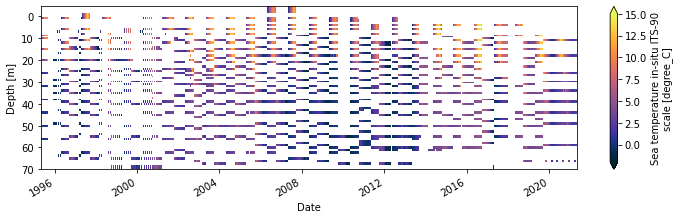

In [28]:
xdf.temperature.plot(yincrease=False,vmax=15,vmin=-2,figsize=(12,3),cmap=cmocean.cm.thermal)

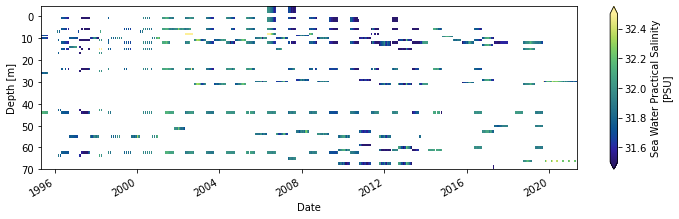

In [29]:
xdf.salinity.plot(yincrease=False,vmax=32.5,vmin=31.5,figsize=(12,3),cmap=cmocean.cm.haline)

In [30]:
#split names and get mooring id
#some groupings are at the same site, but get different names over winter (its the a,b,c nomenclature) so drop the final letter too
df['subname'] = [x.split('_')[-2][2:-1] for x in df['Dataset ID'].values]

#xml related
datahost_path='/home/akutan/bell/in_and_outbox/erddap_generated/foci_products/unified_moorings/'

for groups, dfg in df.groupby('subname'):
    
    if groups in ['bsm','bsm2','bs2','bs2']: #M2
        continue #build seperately due to multinames
    elif dfg['Dataset ID'].count() == 1:
        continue #no reason to build dataset, only one deployment
    else:
        first_dataset=True
        for i,dfs in dfg.iterrows():
            print(dfs['Dataset ID'])
            e.constraints = None
            e.protocol = 'griddap'
            e.dataset_id=dfs['Dataset ID']
            e.response = 'nc'
            try:
                ds = e.to_xarray(decode_times=True)

                if first_dataset:
                    xdf = ds
                    first_dataset = False
                else:
                    xdf = xa.concat([xdf,ds],dim='time')
            except:
                pass
    xdf = xdf.sortby('time')
    xdf = xdf.sortby('depth')
    xdf = xdf.where(xdf != -9999.0,np.nan)
    xdf = xdf.where(xdf['depth'] <5000).dropna(dim='depth',how='all')
    if write_data:
        xdf.to_netcdf('Full_'+groups+'_record'+'.nc',encoding={'time':{'units':'days since 1970-01-01'}})
    erddap_xmlbuild('1hr_gridded_Full_'+groups+'_record'+'.xml', 'Full_'+groups+'_record', MooringName=groups, datahost_path=datahost_path)

1hr_gridded_datasets_Mooring_03amp1a_final
1hr_gridded_datasets_Mooring_03amp1b_final
1hr_gridded_datasets_Mooring_05amp1a_final
1hr_gridded_datasets_Mooring_06amp1a_final
1hr_gridded_datasets_Mooring_08amp1a_final
1hr_gridded_datasets_Mooring_03amp2a_final
1hr_gridded_datasets_Mooring_03amp2b_final
1hr_gridded_datasets_Mooring_05amp2a_final
1hr_gridded_datasets_Mooring_06amp2a_final
1hr_gridded_datasets_Mooring_07amp2a_final
1hr_gridded_datasets_Mooring_08amp2a_final
1hr_gridded_datasets_Mooring_03amp3a_final
1hr_gridded_datasets_Mooring_03amp3b_final
1hr_gridded_datasets_Mooring_05amp3a_final
1hr_gridded_datasets_Mooring_06amp3a_final
1hr_gridded_datasets_Mooring_07amp3a_final
1hr_gridded_datasets_Mooring_08amp3a_final
1hr_gridded_datasets_Mooring_03amp4a_final
1hr_gridded_datasets_Mooring_03amp4b_final
1hr_gridded_datasets_Mooring_05amp4a_final
1hr_gridded_datasets_Mooring_06amp4a_final
1hr_gridded_datasets_Mooring_07amp4a_final
1hr_gridded_datasets_Mooring_08amp4a_final
1hr_gridded

## Now do similar but only for deepest T/S

**Deepest Temp/Sal**
- M2
- M4
- M5
- M8
- C2

**Shallowest Temp**
- M2
- M4
- M5
- M8

**Notes:**
- read in data, drop na's, determine max and min depths
- keep depth and value so it can be masked if its too shallow by the enduser

In [31]:
#read from recently created grouped data and interpolate/extrapolate to fixed bottom depth or
def btm_TS_timeseries(df,mooring_id=[None],parameter='salinity',max_depth=50,verbose=True):
    """
    """
    #xml related
    depth_threshold=50
    first_dataset=True

    #M2
    for groups, dfg in df.groupby('subname'):
        if groups in mooring_id: #M2

            for i,dfs in dfg.iterrows():
                if verbose:
                    print(dfs['Dataset ID'])
                e.constraints = None
                e.protocol = 'griddap'
                e.dataset_id=dfs['Dataset ID']
                e.response = 'nc'
                try:
                    ds = e.to_xarray(decode_times=True)
                    btmsaldepth = ds[parameter].dropna(dim='depth', how='all').depth.max()

                    if btmsaldepth < max_depth:
                        continue

                    if first_dataset:

                        xdf = ds.sel(depth=btmsaldepth)[['temperature','salinity']]
                        first_dataset = False
                    else:
                        xdf = xa.concat([xdf,ds.sel(depth=btmsaldepth)[['temperature','salinity']]],dim='time')
                except:
                    pass
            xdf = xdf.sortby('time')
            xdf = xdf.where(xdf != -9999.0,np.nan)
    return xdf
   

In [32]:
#split names and get mooring id
#some groupings are at the same site, but get different names over winter (its the a,b,c nomenclature) so drop the final letter too
df['subname'] = [x.split('_')[-2][2:-1] for x in df['Dataset ID'].values]

#xml related
datahost_path='/home/akutan/bell/in_and_outbox/erddap_generated/foci_products/unified_moorings/'

xdf = btm_TS_timeseries(df,mooring_id=['bsm','bsm2','bs2'],parameter='salinity',max_depth=50,verbose=False)

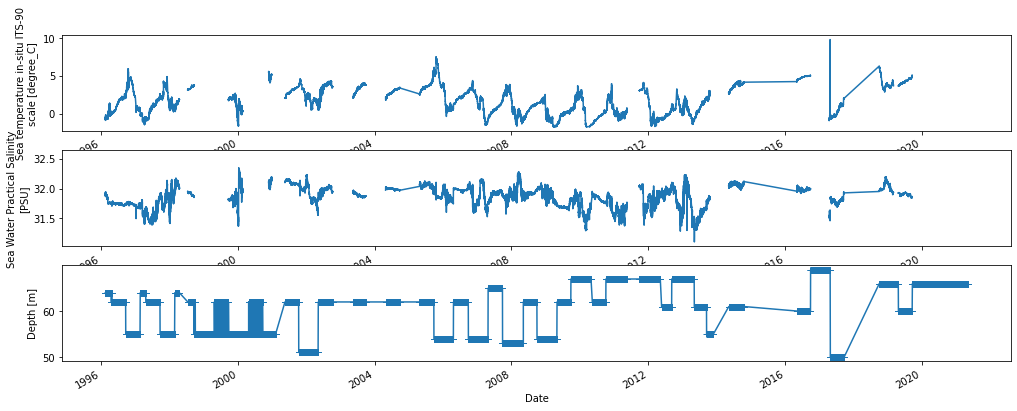

In [33]:
fig, ax = plt.subplots(3,figsize=(17, 6))
xdf.temperature.plot(ax=ax[0])
xdf.salinity.plot(ax=ax[1])
xdf.depth.plot(marker='+',ax=ax[2])

In [34]:
#split names and get mooring id
#some groupings are at the same site, but get different names over winter (its the a,b,c nomenclature) so drop the final letter too
df['subname'] = [x.split('_')[-2][2:-1] for x in df['Dataset ID'].values]

#xml related
datahost_path='/home/akutan/bell/in_and_outbox/erddap_generated/foci_products/unified_moorings/'

xdf = btm_TS_timeseries(df,mooring_id=['bsm','bsm2','bs2'],parameter='temperature',max_depth=50,verbose=False)
xdf.to_netcdf('bs2_bottomtemperature_record'+'.nc',encoding={'time':{'units':'days since 1970-01-01'}})


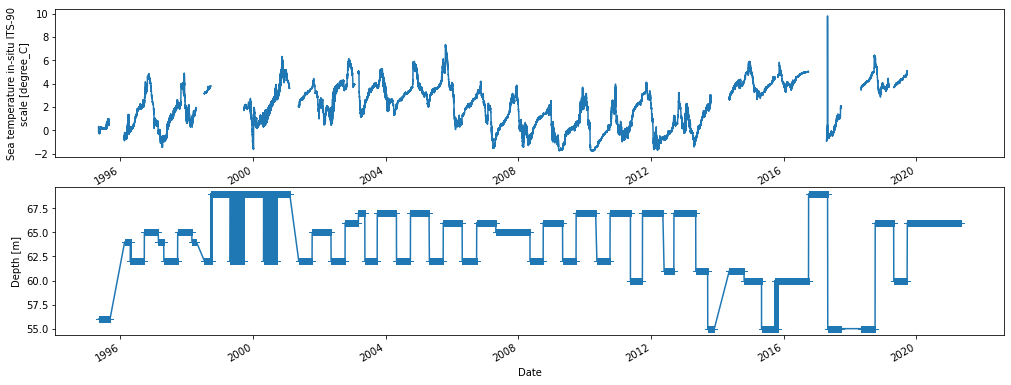

In [35]:
fig, ax = plt.subplots(2,figsize=(17, 6))
xdf.temperature.plot(ax=ax[0])
xdf.depth.plot(marker='+',ax=ax[1])

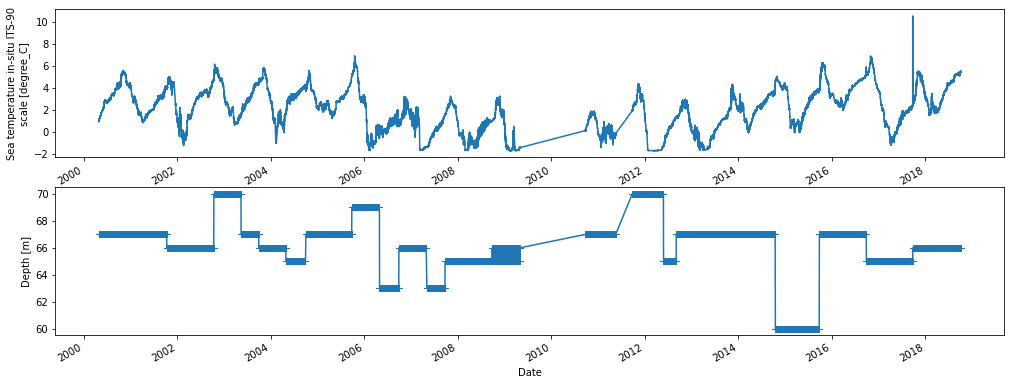

In [36]:
#split names and get mooring id
#some groupings are at the same site, but get different names over winter (its the a,b,c nomenclature) so drop the final letter too
df['subname'] = [x.split('_')[-2][2:-1] for x in df['Dataset ID'].values]

#xml related
datahost_path='/home/akutan/bell/in_and_outbox/erddap_generated/foci_products/unified_moorings/'

xdf = btm_TS_timeseries(df,mooring_id=['bs4'],parameter='temperature',max_depth=50,verbose=False)
xdf.to_netcdf('bs4_bottomtemperature_record'+'.nc',encoding={'time':{'units':'days since 1970-01-01'}})

fig, ax = plt.subplots(2,figsize=(17, 6))
xdf.temperature.plot(ax=ax[0])
xdf.depth.plot(marker='+',ax=ax[1])

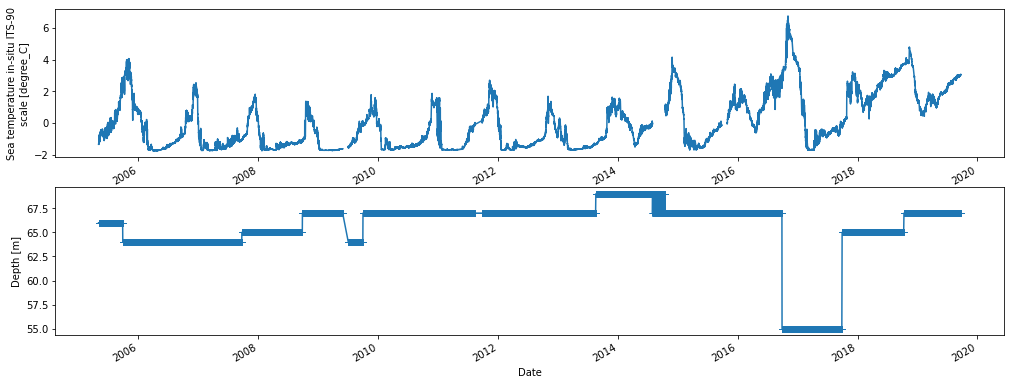

In [37]:
#split names and get mooring id
#some groupings are at the same site, but get different names over winter (its the a,b,c nomenclature) so drop the final letter too
df['subname'] = [x.split('_')[-2][2:-1] for x in df['Dataset ID'].values]

#xml related
datahost_path='/home/akutan/bell/in_and_outbox/erddap_generated/foci_products/unified_moorings/'

xdf = btm_TS_timeseries(df,mooring_id=['bs5'],parameter='temperature',max_depth=50,verbose=False)
xdf.to_netcdf('bs5_bottomtemperature_record'+'.nc',encoding={'time':{'units':'days since 1900-01-01'}})

fig, ax = plt.subplots(2,figsize=(17, 6))
xdf.temperature.plot(ax=ax[0])
xdf.depth.plot(marker='+',ax=ax[1])

AttributeError: 'Dataset' object has no attribute 'depth'

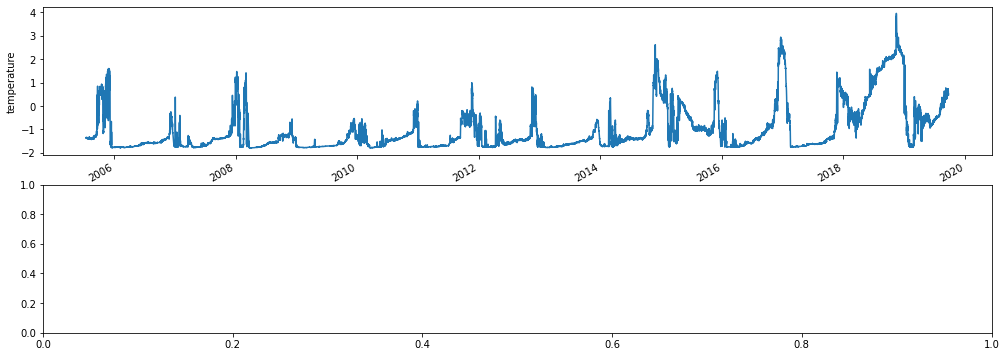

In [38]:
#split names and get mooring id
#some groupings are at the same site, but get different names over winter (its the a,b,c nomenclature) so drop the final letter too
df['subname'] = [x.split('_')[-2][2:-1] for x in df['Dataset ID'].values]

#xml related
datahost_path='/home/akutan/bell/in_and_outbox/erddap_generated/foci_products/unified_moorings/'

xdf = btm_TS_timeseries(df,mooring_id=['bs8'],parameter='temperature',max_depth=50,verbose=False)
xdf = xdf.resample(time='1H').median()
xdf.to_netcdf('bs8_bottomtemperature_record'+'.nc',encoding={'time':{'units':'days since 1970-01-01'}})

fig, ax = plt.subplots(2,figsize=(17, 6))
xdf.temperature.plot(ax=ax[0])
xdf.depth.plot(marker='+',ax=ax[1])